# ECE 285 IVR Assignment 1 - Watermarking

## Arik Horodniceanu A53285765

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import imagetools as im
%matplotlib notebook

## 1 Part I - Bob's watermarking technique

### 1

In [5]:
xalice = plt.imread('assets/img_alice.png')
ybob = plt.imread('assets/img_bob.png')

In [6]:
mask = np.load('assets/mask.npy')

In [7]:
print(xalice.shape)
print(ybob.shape)
print(mask.shape)
print(xalice.max(),xalice.min())
print(ybob.max(),ybob.min())
print(mask.max(),mask.min())

(540, 720, 3)
(540, 720, 3)
(540, 720, 3)
1.0 0.0
1.0 0.007843138
1.0 0.0


These are matrices (3D tensors actually since RGB) of 540x720 dimensions.

Min values are 0 (or ~0.0078) and max is 1.

### 2

<IPython.core.display.Javascript object>


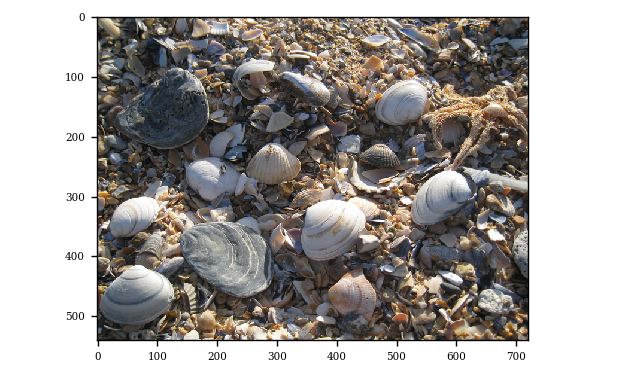

In [7]:
plt.figure()
plt.imshow(xalice)

From left to right: Reset to original view, back to previous view, forward to next view, pan axes with left mouse button, zoom with right mouse button, zoom with rectangle (like mspaint), download image.

### 3

<IPython.core.display.Javascript object>


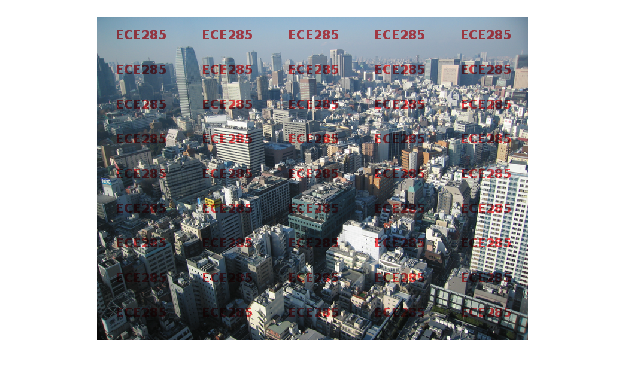

In [8]:
plt.figure()
im.show(ybob)

Same thing, just doesn't show the axes like it says in the function's documentation.

### 4

<IPython.core.display.Javascript object>


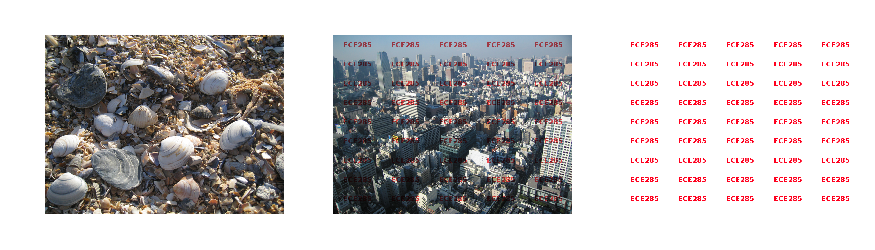

In [24]:
fig, axes = plt.subplots(ncols=3, figsize=(7, 2))
im.show(xalice, ax=axes[0])
im.show(ybob, ax=axes[1])
im.show(mask, ax=axes[2])
fig.show()

First command creates a figure with 3 columns (and 1 default row) for the subplots, each figure size 7x2 (inches).
Next 3 commands are which images are in each position in the row of plots. Last command shows the figure.

### 5

In [8]:
def watermark(x, mask, p):
    lambda_k = 1/((1-p)*mask +p)
    y = lambda_k*x
    return y

<IPython.core.display.Javascript object>


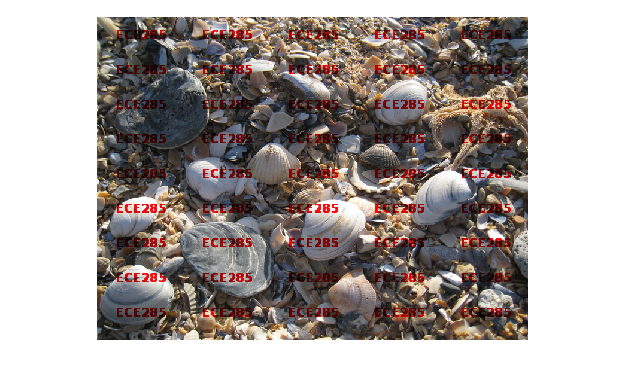

In [18]:
temp=watermark(xalice,mask,20)
im.show(temp)

### 6

<IPython.core.display.Javascript object>


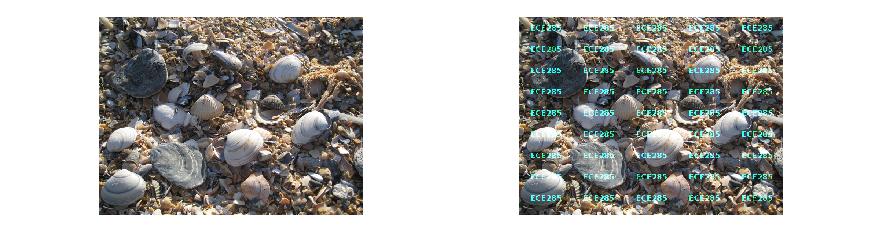

In [18]:
fig, axes = plt.subplots(ncsols=2, figsize=(7, 2))
im.show(xalice, ax=axes[0])
im.show(yalice, ax=axes[1])
fig.show()

Looks about the same as expected.

### 7

<IPython.core.display.Javascript object>


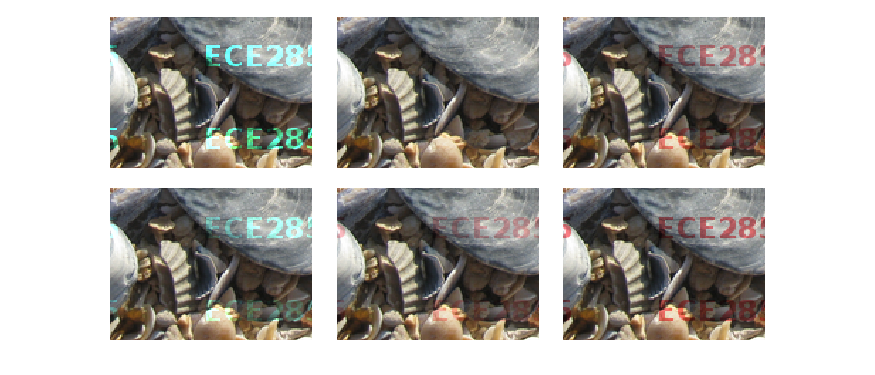

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7, 3), sharex='all', sharey='all')
for k in range(6):
    im.show(watermark(xalice, mask, p=(k+1)/3), ax=axes[k % 2][int(k / 2)])
fig.show()

First command creates figure with 2x3=6 sub-figures in 2 rows 3 columns, which all share the x and y axes.
The 'for' loop creates 6 watermarked images of xalice, with different p (watermark intensity, lower p is stronger blue watermark and vice versa for p<1. For p=1 there's no watermark from the formula, and p>1 is a red watermark with increasing intensity proportional to p) values and for different channels. Last command shows the figure.

## Part II - Alice's watermarking removal technique

### 8

In [14]:
def iwatermark(y,m,p):
    x = ((1-p)*m + p)*y
    return x

### 9

In [15]:
def energy(y, m, p):
    if type(p) is np.ndarray:
        q = p.size
        e = np.zeros(q)
    else:
        q = 1
        e = 0
    m_bar=np.sum(m)/m.size
    
    for idx in range(q):
        x = iwatermark(y,m,p[idx])
        mu_bar = np.sum(x)/x.size
        e[idx]=(np.sum((m-m_bar)*(x-mu_bar))/x.size)**2
    
    return e

### 10

<IPython.core.display.Javascript object>


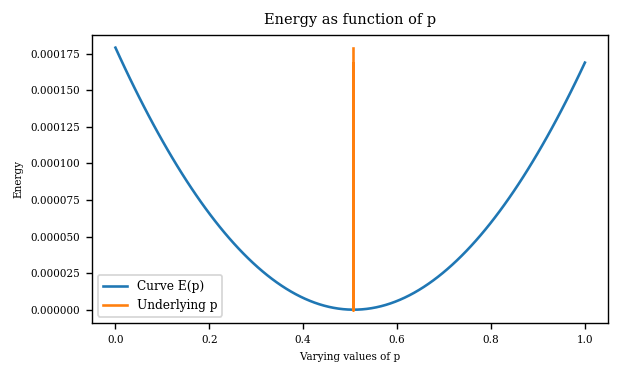

In [25]:
p=0.5
q=100
ptest = np.linspace(0,2*p, q)
y = watermark(xalice,mask,p)
e = energy(y,mask,ptest)
p_const = np.full(q,ptest[e.argmin()])#underlying constant p=0.5 which minimizes the energy
plt.plot(ptest,e)
plt.plot(p_const,e)
plt.xlabel('Varying values of p')
plt.ylabel('Energy')
plt.title('Energy as function of p')
plt.legend(['Curve E(p)','Underlying p'])
plt.show()

Looks pretty similar to what was expected.

### 11

Given $$y_k=\frac{x_k}{(1-p)m_k +p}, \bar{\mu}=\frac{1}{n}\sum_k{\hat{x}_k}, \bar{m}=\frac{1}{n}\sum_k{m_k},\hat{x}_k = [(1-\hat{p})m_k +\hat{p}]y_k$$

$$E(p)=[\frac{1}{n}\sum_k{(m_k-\bar{m})(\hat{x}_k-\bar{\mu})}]^2$$

Expanding the expression and using the definition of $\bar{m}$, we get:

$$E(p)=[\frac{1}{n}\sum_k{(m_k-\bar{m})\hat{x}_k}-\bar{\mu}\frac{1}{n}\sum_k{m_k}+n\frac{1}{n}\bar{m}\bar{\mu}]^2 =$$ 
$$[\frac{1}{n}\sum_k{(m_k-\hat{m})\hat{x}_k}-\bar{m}\bar{\mu}+\bar{m}\bar{\mu}]^2 = [\frac{1}{n}\sum_k{(m_k-\bar{m})\hat{x}_k}]^2$$

Next, plugging in $\hat{x}_k = ((1-\hat{p})m_k + \hat{p})y_k$ into the above expression and rearranging we get:

$$E(\hat{p})=[\frac{1}{n}\sum_k{((m_k-\bar{m})\hat{x}_k})(y_k(1-\hat{p})m_k - \hat{p})]^2=$$
$$[\frac{1}{n}\sum_k{((m_k-\bar{m})m_ky_k})+\hat{p}\frac{1}{n}\sum_k{(m_k-\bar{m})y_k(1-m_k)}]^2$$

Denote $$a=\frac{1}{n}\sum_k{((m_k-\bar{m})m_ky_k});b=\frac{1}{n}\sum_k{(m_k-\bar{m})y_k(1-m_k)}\rightarrow E(\hat{p})=(a+b\hat{p})^2$$
Taking the derivate with respect to $\hat{p}$ we get:
$$\frac{dE(\hat{p})}{d\hat{p}}=2ab+2b^2\hat{p}=0 \rightarrow \hat{p}=\frac{-a}{b}=\frac{\sum_k{(\bar{m}-m_k)m_ky_k}}{\sum_k{(m_k-\bar{m})y_k(1-m_k)}}$$

Or in the problem's notation: $$\alpha_k=(\bar{m}-m_k)m_k; \beta_k=(m_k-\bar{m})(1-m_k)$$

For coherency, denote the second derivative is $4b\ge 0$ as $\sum_k{m_k-\bar{m}}\ge 0, 1\ge m_k , y_k\ge 0, \forall k$, since the pixel values are all positive. So the estimate is a minimum.

### 12

In [16]:
def estimate_p(y,m):
    # according to 11
    m_bar=np.sum(m)/m.size
    p=np.sum((m_bar-m)*m*y)
    p/=np.sum((m-m_bar)*(1-m)*y)
    return p

<IPython.core.display.Javascript object>


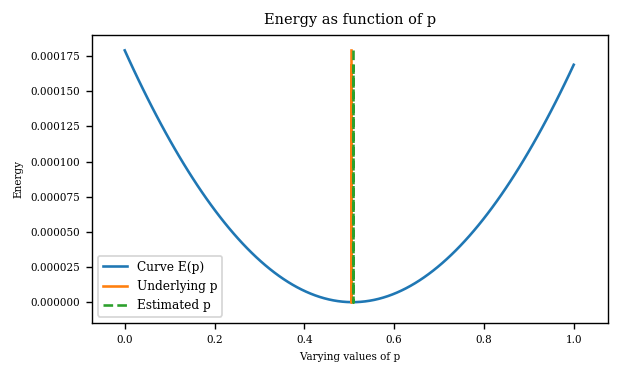

In [25]:
p=0.5
q=100
yalice = watermark(xalice,mask,p)
p_est=estimate_p(yalice,mask)
ptest = np.linspace(0,2*p, q)
e = energy(yalice,mask,ptest)
p_const = np.full(q,ptest[e.argmin()]) #underlying constant p=0.5 which minimizes the energy
p_es = np.full(q,p_est) # estimated p
plt.plot(ptest,e)
plt.plot(p_const,e)
plt.plot(p_es,e,linestyle='--')
plt.xlabel('Varying values of p')
plt.ylabel('Energy')
plt.title('Energy as function of p')
plt.legend(['Curve E(p)','Underlying p','Estimated p'])
plt.show()

Looks as expected, was able to reconstruct almost accurately, p_est=0.507.

### 13

In [13]:
p_bob=estimate_p(ybob,mask)
print('Bob used p='+str(p_bob))
bob_est=iwatermark(ybob,mask,p_bob)

Bob used p=3.1415871424452884


Bob has been using $p\simeq \pi$.

### 14

<IPython.core.display.Javascript object>


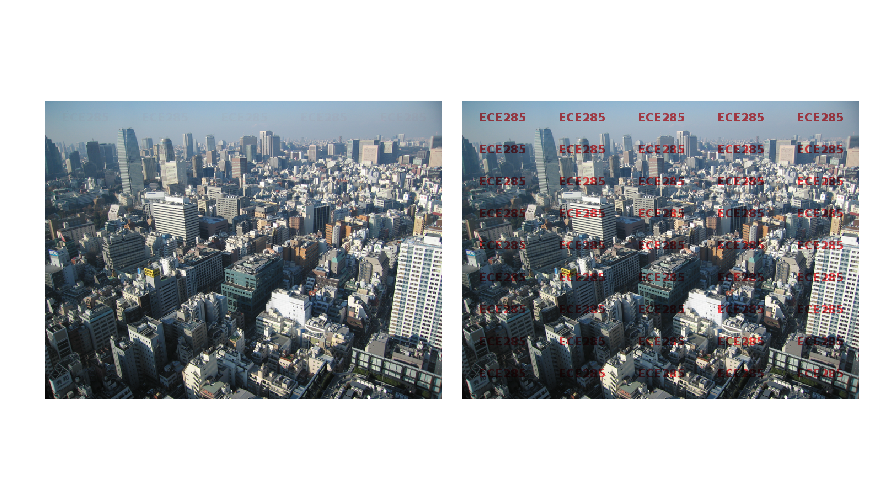

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4), sharex='all', sharey='all')
im.show(bob_est, ax=axes[0])
im.show(ybob, ax=axes[1])
fig.show()

<IPython.core.display.Javascript object>


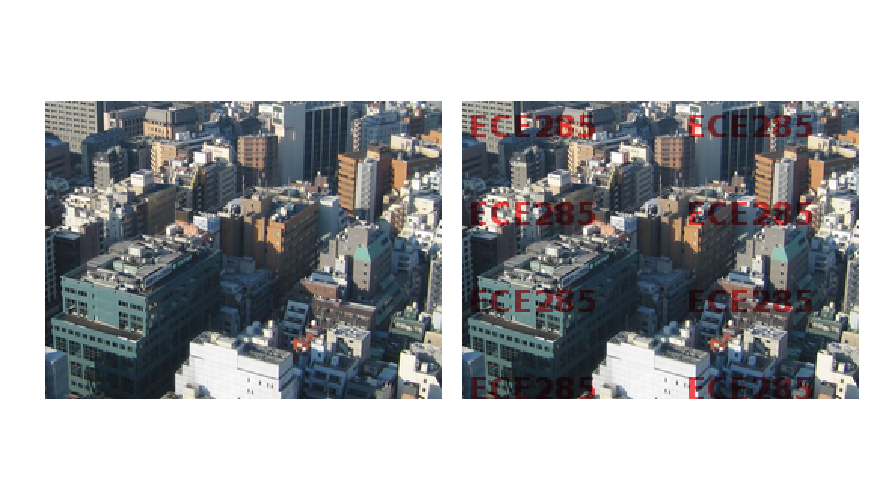

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 4), sharex='all', sharey='all')
im.show(bob_est, ax=axes[0])
im.show(ybob, ax=axes[1])
fig.show()

### 15

Alice was right, the watermark was removed (somewhat) easily and the image was reconstructed successfully.